## Q4(b) Weighted Loss

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [2]:
class_weights = 1.0 / torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])
class_weights[9] = 0 # ignore unlabeled class
# class_weights

In [3]:
# def compute_class_weights(dataloader):
#     # Labels: batch_size x height x width
#     total_num_pixels = 0
#     n_class = 10
#     class_weights = torch.zeros(n_class)
#     for i, (inputs, labels) in enumerate(dataloader):
#         total_num_pixels += labels.shape[0] * labels.shape[1] * labels.shape[2]
#         for cur_class in range(n_class):
#             class_weights[cur_class] += torch.sum(labels == cur_class)
#         print("SANITY CHECK:", total_num_pixels, class_weights.sum())
#         print("class_weights:", class_weights)
        
#     return class_weights / total_num_pixels

In [4]:
# train_dataset_original_1 = TASDataset('tas500v1.1') 
# train_loader_1 = DataLoader(dataset=train_dataset_original_1, batch_size= 16, shuffle=False)

# class_weights = compute_class_weights(train_loader_1)
# print(class_weights)

In [5]:
#hyper param
epochs = 50   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4b_50e_no9"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 3.039128269468035
IoU at epoch: 0 is 0.0008389227175551874
Pixel acc at epoch: 0 is 0.006198363145813346
in train


  0%|          | 0/50 [00:00<?, ?it/s]

epoch0, iter0, loss: 2.449401617050171
epoch0, iter10, loss: 1.9243085384368896
epoch0, iter20, loss: 1.7340160608291626
epoch0, iter30, loss: 1.8973051309585571
epoch0, iter40, loss: 1.735914945602417
epoch0, iter50, loss: 1.5601239204406738
Finish epoch 0, time elapsed 77.14116549491882
in val


  2%|▏         | 1/50 [01:23<1:08:00, 83.28s/it]

Loss at epoch: 0 is 3.0560307843344554
IoU at epoch: 0 is 0.12639890211665347
Pixel acc at epoch: 0 is 0.5925720248903547
epoch1, iter0, loss: 1.617706060409546
epoch1, iter10, loss: 1.2196420431137085
epoch1, iter20, loss: 1.3503001928329468
epoch1, iter30, loss: 1.4635581970214844
epoch1, iter40, loss: 1.0997388362884521
epoch1, iter50, loss: 0.9633467793464661
Finish epoch 1, time elapsed 71.2395670413971
in val


  4%|▍         | 2/50 [02:39<1:03:30, 79.38s/it]

Loss at epoch: 1 is 1.1501920052937098
IoU at epoch: 1 is 0.21074709390328888
Pixel acc at epoch: 1 is 0.7212053792817252
epoch2, iter0, loss: 1.2467083930969238
epoch2, iter10, loss: 1.2386711835861206
epoch2, iter20, loss: 1.1501051187515259
epoch2, iter30, loss: 1.4471815824508667
epoch2, iter40, loss: 0.9818721413612366
epoch2, iter50, loss: 1.3897038698196411
Finish epoch 2, time elapsed 64.65665054321289
in val


  6%|▌         | 3/50 [03:49<58:41, 74.93s/it]  

Loss at epoch: 2 is 1.2170909132276262
IoU at epoch: 2 is 0.18764050255479164
Pixel acc at epoch: 2 is 0.6904478711741311
epoch3, iter0, loss: 1.183841347694397
epoch3, iter10, loss: 1.0313047170639038
epoch3, iter20, loss: 0.8879886269569397
epoch3, iter30, loss: 1.136121153831482
epoch3, iter40, loss: 0.7838551998138428
epoch3, iter50, loss: 0.9442058205604553
Finish epoch 3, time elapsed 68.22497534751892
in val


  8%|▊         | 4/50 [05:02<56:59, 74.34s/it]

Loss at epoch: 3 is 1.032560842377799
IoU at epoch: 3 is 0.2252575219295284
Pixel acc at epoch: 3 is 0.7478157452174595
epoch4, iter0, loss: 0.9385664463043213
epoch4, iter10, loss: 1.5177454948425293
epoch4, iter20, loss: 0.7040082812309265
epoch4, iter30, loss: 0.8544285893440247
epoch4, iter40, loss: 0.9256837368011475
epoch4, iter50, loss: 1.0341342687606812
Finish epoch 4, time elapsed 66.23075294494629
in val


 10%|█         | 5/50 [06:14<55:02, 73.39s/it]

Loss at epoch: 4 is 0.9016471334866115
IoU at epoch: 4 is 0.2509993702754224
Pixel acc at epoch: 4 is 0.7524653673171997
epoch5, iter0, loss: 1.141067385673523
epoch5, iter10, loss: 0.5909228920936584
epoch5, iter20, loss: 1.265331745147705
epoch5, iter30, loss: 0.8353868126869202
epoch5, iter40, loss: 0.6751768589019775
epoch5, iter50, loss: 1.0861934423446655
Finish epoch 5, time elapsed 66.62717342376709
in val


 12%|█▏        | 6/50 [07:26<53:31, 72.99s/it]

Loss at epoch: 5 is 0.8988515564373561
IoU at epoch: 5 is 0.2826759525707237
Pixel acc at epoch: 5 is 0.7417828440666199
epoch6, iter0, loss: 0.9453623294830322
epoch6, iter10, loss: 0.8369112610816956
epoch6, iter20, loss: 0.5046642422676086
epoch6, iter30, loss: 0.8546770215034485
epoch6, iter40, loss: 0.6648706793785095
epoch6, iter50, loss: 0.6533527970314026
Finish epoch 6, time elapsed 64.42085433006287
in val


 14%|█▍        | 7/50 [08:36<51:31, 71.88s/it]

Loss at epoch: 6 is 0.8027631299836295
IoU at epoch: 6 is 0.2999877837953266
Pixel acc at epoch: 6 is 0.7687447922570365
epoch7, iter0, loss: 0.8282588124275208
epoch7, iter10, loss: 0.5873410701751709
epoch7, iter20, loss: 0.9855042695999146
epoch7, iter30, loss: 0.5211012959480286
epoch7, iter40, loss: 0.7439435124397278
epoch7, iter50, loss: 0.8795802593231201
Finish epoch 7, time elapsed 67.90305924415588
in val


 16%|█▌        | 8/50 [09:50<50:42, 72.43s/it]

Loss at epoch: 7 is 0.6799425312450954
IoU at epoch: 7 is 0.3547814857945123
Pixel acc at epoch: 7 is 0.800277726990836
epoch8, iter0, loss: 0.5015159845352173
epoch8, iter10, loss: 0.7355996966362
epoch8, iter20, loss: 0.8614333868026733
epoch8, iter30, loss: 0.5104532241821289
epoch8, iter40, loss: 0.4804013967514038
epoch8, iter50, loss: 0.6289156675338745
Finish epoch 8, time elapsed 66.96058201789856
in val


 18%|█▊        | 9/50 [11:02<49:33, 72.52s/it]

Loss at epoch: 8 is 0.6362480734075818
IoU at epoch: 8 is 0.34062618344753337
Pixel acc at epoch: 8 is 0.8141090614455087
epoch9, iter0, loss: 0.5002571940422058
epoch9, iter10, loss: 0.7587248682975769
epoch9, iter20, loss: 0.6364719271659851
epoch9, iter30, loss: 0.659366250038147
epoch9, iter40, loss: 0.7777352333068848
epoch9, iter50, loss: 0.38930633664131165
Finish epoch 9, time elapsed 66.13900446891785
in val


 20%|██        | 10/50 [12:14<48:11, 72.28s/it]

Loss at epoch: 9 is 0.5720943510532379
IoU at epoch: 9 is 0.35228784581617917
Pixel acc at epoch: 9 is 0.8188872337341309
epoch10, iter0, loss: 0.5432355403900146
epoch10, iter10, loss: 0.4595886468887329
epoch10, iter20, loss: 0.6796965003013611
epoch10, iter30, loss: 0.4945843517780304
epoch10, iter40, loss: 0.4501466155052185
epoch10, iter50, loss: 0.43345755338668823
Finish epoch 10, time elapsed 66.06824946403503
in val


 22%|██▏       | 11/50 [13:25<46:47, 71.99s/it]

Loss at epoch: 10 is 0.709046334028244
IoU at epoch: 10 is 0.3174502834500301
Pixel acc at epoch: 10 is 0.7749384215899876
epoch11, iter0, loss: 0.8729752898216248
epoch11, iter10, loss: 0.6152502298355103
epoch11, iter20, loss: 0.46235334873199463
epoch11, iter30, loss: 0.45349550247192383
epoch11, iter40, loss: 0.800162672996521
epoch11, iter50, loss: 0.6606054306030273
Finish epoch 11, time elapsed 64.69131135940552
in val


 24%|██▍       | 12/50 [14:36<45:14, 71.43s/it]

Loss at epoch: 11 is 0.5393897891044617
IoU at epoch: 11 is 0.3913652936925433
Pixel acc at epoch: 11 is 0.8265363659177508
epoch12, iter0, loss: 0.5575172901153564
epoch12, iter10, loss: 0.4865707755088806
epoch12, iter20, loss: 0.6117264628410339
epoch12, iter30, loss: 0.536980390548706
epoch12, iter40, loss: 0.453692764043808
epoch12, iter50, loss: 0.5746344923973083
Finish epoch 12, time elapsed 66.66521120071411
in val


 26%|██▌       | 13/50 [15:48<44:09, 71.60s/it]

Loss at epoch: 12 is 0.5443517054830279
IoU at epoch: 12 is 0.38566632660609385
Pixel acc at epoch: 12 is 0.826129538672311
epoch13, iter0, loss: 0.3699127435684204
epoch13, iter10, loss: 0.583876371383667
epoch13, iter20, loss: 0.626585841178894
epoch13, iter30, loss: 0.46401944756507874
epoch13, iter40, loss: 0.6487504243850708
epoch13, iter50, loss: 0.4164329469203949
Finish epoch 13, time elapsed 67.99003481864929
in val


 28%|██▊       | 14/50 [17:01<43:17, 72.16s/it]

Loss at epoch: 13 is 0.46607994181769236
IoU at epoch: 13 is 0.4196490141773773
Pixel acc at epoch: 13 is 0.8528688549995422
epoch14, iter0, loss: 0.29131844639778137
epoch14, iter10, loss: 0.5040843486785889
epoch14, iter20, loss: 0.44905534386634827
epoch14, iter30, loss: 0.3160198926925659
epoch14, iter40, loss: 0.46292686462402344
epoch14, iter50, loss: 0.5262753367424011
Finish epoch 14, time elapsed 66.00103497505188
in val


 30%|███       | 15/50 [18:13<42:01, 72.03s/it]

Loss at epoch: 14 is 0.47415462136268616
IoU at epoch: 14 is 0.4225728888291077
Pixel acc at epoch: 14 is 0.8522495712552752
epoch15, iter0, loss: 0.8063415288925171
epoch15, iter10, loss: 0.5265151858329773
epoch15, iter20, loss: 0.492637574672699
epoch15, iter30, loss: 0.5442245006561279
epoch15, iter40, loss: 0.35468557476997375
epoch15, iter50, loss: 0.5566746592521667
Finish epoch 15, time elapsed 65.37975287437439
in val


 32%|███▏      | 16/50 [19:24<40:36, 71.66s/it]

Loss at epoch: 15 is 0.5695270810808454
IoU at epoch: 15 is 0.3934588683930135
Pixel acc at epoch: 15 is 0.822689243725368
epoch16, iter0, loss: 0.36588817834854126
epoch16, iter10, loss: 0.49166998267173767
epoch16, iter20, loss: 0.30685698986053467
epoch16, iter30, loss: 0.6667324900627136
epoch16, iter40, loss: 0.7893258333206177
epoch16, iter50, loss: 0.5279877185821533
Finish epoch 16, time elapsed 65.18316411972046
in val


 34%|███▍      | 17/50 [20:34<39:12, 71.28s/it]

Loss at epoch: 16 is 0.6426264941692352
IoU at epoch: 16 is 0.361209802909769
Pixel acc at epoch: 16 is 0.8200815916061401
epoch17, iter0, loss: 0.47177308797836304
epoch17, iter10, loss: 0.4764541983604431
epoch17, iter20, loss: 0.3566044569015503
epoch17, iter30, loss: 0.5168604850769043
epoch17, iter40, loss: 0.6349539160728455
epoch17, iter50, loss: 0.5464729070663452
Finish epoch 17, time elapsed 67.17807340621948
in val


 36%|███▌      | 18/50 [21:47<38:19, 71.85s/it]

Loss at epoch: 17 is 0.49825890575136456
IoU at epoch: 17 is 0.4259746035194957
Pixel acc at epoch: 17 is 0.8458758933203561
epoch18, iter0, loss: 0.42307478189468384
epoch18, iter10, loss: 0.6611588001251221
epoch18, iter20, loss: 0.5287967324256897
epoch18, iter30, loss: 0.28400900959968567
epoch18, iter40, loss: 0.39651310443878174
epoch18, iter50, loss: 0.3381318747997284
Finish epoch 18, time elapsed 68.59236526489258
in val


 38%|███▊      | 19/50 [23:01<37:26, 72.47s/it]

Loss at epoch: 18 is 0.4212382435798645
IoU at epoch: 18 is 0.4395679214225695
Pixel acc at epoch: 18 is 0.8658021518162319
epoch19, iter0, loss: 0.3980642259120941
epoch19, iter10, loss: 0.3333824872970581
epoch19, iter20, loss: 0.3416811525821686
epoch19, iter30, loss: 0.5424116849899292
epoch19, iter40, loss: 0.5747470259666443
epoch19, iter50, loss: 0.5953239798545837
Finish epoch 19, time elapsed 67.19901585578918
in val


 40%|████      | 20/50 [24:13<36:13, 72.45s/it]

Loss at epoch: 19 is 0.5120668113231659
IoU at epoch: 19 is 0.4378955822217562
Pixel acc at epoch: 19 is 0.8369749784469604
epoch20, iter0, loss: 0.43428775668144226
epoch20, iter10, loss: 0.6689093112945557
epoch20, iter20, loss: 0.34963443875312805
epoch20, iter30, loss: 0.40255698561668396
epoch20, iter40, loss: 0.7181321382522583
epoch20, iter50, loss: 0.5096462965011597
Finish epoch 20, time elapsed 67.2157781124115
in val


 42%|████▏     | 21/50 [25:26<35:05, 72.62s/it]

Loss at epoch: 20 is 0.419246569275856
IoU at epoch: 20 is 0.4266882311042984
Pixel acc at epoch: 20 is 0.8707097343036106
epoch21, iter0, loss: 0.24671882390975952
epoch21, iter10, loss: 0.3707035779953003
epoch21, iter20, loss: 0.3769334852695465
epoch21, iter30, loss: 0.40228450298309326
epoch21, iter40, loss: 0.23308531939983368
epoch21, iter50, loss: 0.46206262707710266
Finish epoch 21, time elapsed 65.37054514884949
in val


 44%|████▍     | 22/50 [26:37<33:37, 72.07s/it]

Loss at epoch: 21 is 0.40003470863614765
IoU at epoch: 21 is 0.47168307997370923
Pixel acc at epoch: 21 is 0.8758161408560616
epoch22, iter0, loss: 0.47455930709838867
epoch22, iter10, loss: 0.4665429890155792
epoch22, iter20, loss: 0.582940399646759
epoch22, iter30, loss: 0.2709757387638092
epoch22, iter40, loss: 0.4471031725406647
epoch22, iter50, loss: 0.5723080039024353
Finish epoch 22, time elapsed 66.4542543888092
in val


 46%|████▌     | 23/50 [27:49<32:22, 71.94s/it]

Loss at epoch: 22 is 0.41221058794430326
IoU at epoch: 22 is 0.4732420605533681
Pixel acc at epoch: 22 is 0.8628652436392648
epoch23, iter0, loss: 0.3084421753883362
epoch23, iter10, loss: 0.5000221729278564
epoch23, iter20, loss: 0.410230427980423
epoch23, iter30, loss: 0.5251490473747253
epoch23, iter40, loss: 0.27923843264579773
epoch23, iter50, loss: 0.3729981780052185
Finish epoch 23, time elapsed 65.15946364402771
in val


 48%|████▊     | 24/50 [28:59<30:59, 71.53s/it]

Loss at epoch: 23 is 0.42805491600717815
IoU at epoch: 23 is 0.4299028466219112
Pixel acc at epoch: 23 is 0.8624909520149231
epoch24, iter0, loss: 0.4675556719303131
epoch24, iter10, loss: 0.24222606420516968
epoch24, iter20, loss: 0.46162086725234985
epoch24, iter30, loss: 0.35860487818717957
epoch24, iter40, loss: 0.556261420249939
epoch24, iter50, loss: 0.21048395335674286
Finish epoch 24, time elapsed 66.97214388847351
in val


 50%|█████     | 25/50 [30:12<29:53, 71.75s/it]

Loss at epoch: 24 is 0.4274625416312899
IoU at epoch: 24 is 0.4455073849558278
Pixel acc at epoch: 24 is 0.8719797474997384
epoch25, iter0, loss: 0.3658919334411621
epoch25, iter10, loss: 0.482974648475647
epoch25, iter20, loss: 0.3190174400806427
epoch25, iter30, loss: 0.3534614145755768
epoch25, iter40, loss: 0.29265540838241577
epoch25, iter50, loss: 0.25273454189300537
Finish epoch 25, time elapsed 68.92804646492004
in val


 52%|█████▏    | 26/50 [31:26<29:02, 72.58s/it]

Loss at epoch: 25 is 0.3795218531574522
IoU at epoch: 25 is 0.48910607600186784
Pixel acc at epoch: 25 is 0.8766492690358844
epoch26, iter0, loss: 0.34135356545448303
epoch26, iter10, loss: 0.25793829560279846
epoch26, iter20, loss: 0.34141895174980164
epoch26, iter30, loss: 0.35316991806030273
epoch26, iter40, loss: 0.481244832277298
epoch26, iter50, loss: 0.24147646129131317
Finish epoch 26, time elapsed 63.697189807891846
in val


 54%|█████▍    | 27/50 [32:35<27:25, 71.56s/it]

Loss at epoch: 26 is 0.36945883078234537
IoU at epoch: 26 is 0.48097729420209145
Pixel acc at epoch: 26 is 0.8766523259026664
epoch27, iter0, loss: 0.28269851207733154
epoch27, iter10, loss: 0.3352509140968323
epoch27, iter20, loss: 0.34052038192749023
epoch27, iter30, loss: 1.1289982795715332
epoch27, iter40, loss: 0.27775654196739197
epoch27, iter50, loss: 0.420045405626297
Finish epoch 27, time elapsed 64.93745708465576
in val


 56%|█████▌    | 28/50 [33:46<26:09, 71.32s/it]

Loss at epoch: 27 is 0.4414896752153124
IoU at epoch: 27 is 0.42363195317519725
Pixel acc at epoch: 27 is 0.8503130418913705
epoch28, iter0, loss: 0.38435566425323486
epoch28, iter10, loss: 0.2513064444065094
epoch28, iter20, loss: 0.3537222146987915
epoch28, iter30, loss: 0.3893451690673828
epoch28, iter40, loss: 0.21758872270584106
epoch28, iter50, loss: 0.22637970745563507
Finish epoch 28, time elapsed 67.83567523956299
in val


 58%|█████▊    | 29/50 [35:00<25:13, 72.09s/it]

Loss at epoch: 28 is 0.34937563112803866
IoU at epoch: 28 is 0.4521761103759571
Pixel acc at epoch: 28 is 0.8865094610622951
epoch29, iter0, loss: 0.28171560168266296
epoch29, iter10, loss: 0.3305000960826874
epoch29, iter20, loss: 0.2585870623588562
epoch29, iter30, loss: 0.31285804510116577
epoch29, iter40, loss: 0.3016666769981384
epoch29, iter50, loss: 0.3413940370082855
Finish epoch 29, time elapsed 65.77218008041382
in val


 60%|██████    | 30/50 [36:11<23:55, 71.79s/it]

Loss at epoch: 29 is 0.32404753778662
IoU at epoch: 29 is 0.48212328158983103
Pixel acc at epoch: 29 is 0.8930438501494271
epoch30, iter0, loss: 0.5260419845581055
epoch30, iter10, loss: 0.31121203303337097
epoch30, iter20, loss: 0.2877342104911804
epoch30, iter30, loss: 0.5214595794677734
epoch30, iter40, loss: 0.362662672996521
epoch30, iter50, loss: 0.3510757088661194
Finish epoch 30, time elapsed 67.12809252738953
in val


 62%|██████▏   | 31/50 [37:24<22:48, 72.01s/it]

Loss at epoch: 30 is 0.35468511496271404
IoU at epoch: 30 is 0.4770633904391573
Pixel acc at epoch: 30 is 0.8862147671835763
epoch31, iter0, loss: 0.36832141876220703
epoch31, iter10, loss: 0.4299638569355011
epoch31, iter20, loss: 0.41364753246307373
epoch31, iter30, loss: 0.47763708233833313
epoch31, iter40, loss: 0.3457956314086914
epoch31, iter50, loss: 0.22438457608222961
Finish epoch 31, time elapsed 70.02511286735535
in val


 64%|██████▍   | 32/50 [38:39<21:53, 72.98s/it]

Loss at epoch: 31 is 0.37248635079179493
IoU at epoch: 31 is 0.4499941449227793
Pixel acc at epoch: 31 is 0.8784096411296299
epoch32, iter0, loss: 0.30944162607192993
epoch32, iter10, loss: 0.202019602060318
epoch32, iter20, loss: 0.3304417133331299
epoch32, iter30, loss: 0.19048582017421722
epoch32, iter40, loss: 0.2912534177303314
epoch32, iter50, loss: 0.19407272338867188
Finish epoch 32, time elapsed 65.37045454978943
in val


 66%|██████▌   | 33/50 [39:49<20:27, 72.20s/it]

Loss at epoch: 32 is 0.37590725081307547
IoU at epoch: 32 is 0.4612061726673144
Pixel acc at epoch: 32 is 0.8620140211922782
epoch33, iter0, loss: 0.3243732154369354
epoch33, iter10, loss: 0.3103886842727661
epoch33, iter20, loss: 0.36252227425575256
epoch33, iter30, loss: 0.27724969387054443
epoch33, iter40, loss: 0.43111029267311096
epoch33, iter50, loss: 0.36113616824150085
Finish epoch 33, time elapsed 66.13271427154541
in val


 68%|██████▊   | 34/50 [41:01<19:13, 72.09s/it]

Loss at epoch: 33 is 0.3094303160905838
IoU at epoch: 33 is 0.5111187508789998
Pixel acc at epoch: 33 is 0.8935808454241071
epoch34, iter0, loss: 0.2683838903903961
epoch34, iter10, loss: 0.3000510036945343
epoch34, iter20, loss: 0.5283051133155823
epoch34, iter30, loss: 0.4185527265071869
epoch34, iter40, loss: 0.3858948051929474
epoch34, iter50, loss: 0.2780519127845764
Finish epoch 34, time elapsed 65.89828658103943
in val


 70%|███████   | 35/50 [42:12<17:57, 71.80s/it]

Loss at epoch: 34 is 0.3245542347431183
IoU at epoch: 34 is 0.5233302196259969
Pixel acc at epoch: 34 is 0.895176615033831
epoch35, iter0, loss: 0.5227791666984558
epoch35, iter10, loss: 0.21113567054271698
epoch35, iter20, loss: 0.3194493353366852
epoch35, iter30, loss: 0.3483302593231201
epoch35, iter40, loss: 0.31870371103286743
epoch35, iter50, loss: 0.4346185028553009
Finish epoch 35, time elapsed 67.96929574012756
in val


 72%|███████▏  | 36/50 [43:26<16:51, 72.27s/it]

Loss at epoch: 35 is 0.3766801506280899
IoU at epoch: 35 is 0.49558150652128685
Pixel acc at epoch: 35 is 0.8796077455793109
epoch36, iter0, loss: 0.2362760454416275
epoch36, iter10, loss: 0.40132254362106323
epoch36, iter20, loss: 0.2738392651081085
epoch36, iter30, loss: 0.203511044383049
epoch36, iter40, loss: 0.37134382128715515
epoch36, iter50, loss: 0.33865833282470703
Finish epoch 36, time elapsed 67.0193932056427
in val


 74%|███████▍  | 37/50 [44:38<15:41, 72.39s/it]

Loss at epoch: 36 is 0.401984446815082
IoU at epoch: 36 is 0.46283390172128935
Pixel acc at epoch: 36 is 0.8771728447505406
epoch37, iter0, loss: 0.3602086901664734
epoch37, iter10, loss: 0.48390069603919983
epoch37, iter20, loss: 0.23917900025844574
epoch37, iter30, loss: 0.19487839937210083
epoch37, iter40, loss: 0.15533766150474548
epoch37, iter50, loss: 0.22263434529304504
Finish epoch 37, time elapsed 67.03375720977783
in val


 76%|███████▌  | 38/50 [45:51<14:28, 72.38s/it]

Loss at epoch: 37 is 0.3162325918674469
IoU at epoch: 37 is 0.530733563174022
Pixel acc at epoch: 37 is 0.8977049929755074
epoch38, iter0, loss: 0.23580853641033173
epoch38, iter10, loss: 0.18008364737033844
epoch38, iter20, loss: 0.4232664704322815
epoch38, iter30, loss: 0.21896488964557648
epoch38, iter40, loss: 0.3180190324783325
epoch38, iter50, loss: 0.3407772183418274
Finish epoch 38, time elapsed 64.79215145111084
in val


 78%|███████▊  | 39/50 [47:01<13:09, 71.76s/it]

Loss at epoch: 38 is 0.34492817733969006
IoU at epoch: 38 is 0.5126567097603771
Pixel acc at epoch: 38 is 0.8821794220379421
epoch39, iter0, loss: 0.3235306441783905
epoch39, iter10, loss: 0.41322118043899536
epoch39, iter20, loss: 0.27555885910987854
epoch39, iter30, loss: 0.4350975751876831
epoch39, iter40, loss: 0.2588261365890503
epoch39, iter50, loss: 0.2438129037618637
Finish epoch 39, time elapsed 63.261817932128906
in val


 80%|████████  | 40/50 [48:09<11:47, 70.72s/it]

Loss at epoch: 39 is 0.28529357058661325
IoU at epoch: 39 is 0.5434455150934232
Pixel acc at epoch: 39 is 0.9068895578384399
epoch40, iter0, loss: 0.28271210193634033
epoch40, iter10, loss: 0.2587190568447113
epoch40, iter20, loss: 0.5583587288856506
epoch40, iter30, loss: 0.221075639128685
epoch40, iter40, loss: 0.27426066994667053
epoch40, iter50, loss: 0.3991719186306
Finish epoch 40, time elapsed 66.79074025154114
in val


 82%|████████▏ | 41/50 [49:21<10:39, 71.08s/it]

Loss at epoch: 40 is 0.3102978638240269
IoU at epoch: 40 is 0.5347112797664725
Pixel acc at epoch: 40 is 0.9009905798094613
epoch41, iter0, loss: 0.45007753372192383
epoch41, iter10, loss: 0.25143277645111084
epoch41, iter20, loss: 0.1705237478017807
epoch41, iter30, loss: 0.304732084274292
epoch41, iter40, loss: 0.3569733500480652
epoch41, iter50, loss: 0.2178935408592224
Finish epoch 41, time elapsed 69.87266087532043
in val


 84%|████████▍ | 42/50 [50:36<09:38, 72.30s/it]

Loss at epoch: 41 is 0.32421633175441195
IoU at epoch: 41 is 0.5350104324174926
Pixel acc at epoch: 41 is 0.8960644858224052
epoch42, iter0, loss: 0.23818625509738922
epoch42, iter10, loss: 0.22989977896213531
epoch42, iter20, loss: 0.4035715162754059
epoch42, iter30, loss: 0.3832620084285736
epoch42, iter40, loss: 0.2220468670129776
epoch42, iter50, loss: 0.2873688340187073
Finish epoch 42, time elapsed 64.51991844177246
in val


 86%|████████▌ | 43/50 [51:46<08:20, 71.53s/it]

Loss at epoch: 42 is 0.2887717123542513
IoU at epoch: 42 is 0.49479382720938514
Pixel acc at epoch: 42 is 0.9055669903755188
epoch43, iter0, loss: 0.32056725025177
epoch43, iter10, loss: 0.308689147233963
epoch43, iter20, loss: 0.296505331993103
epoch43, iter30, loss: 0.32867494225502014
epoch43, iter40, loss: 0.3745800256729126
epoch43, iter50, loss: 0.19233404099941254
Finish epoch 43, time elapsed 70.52684926986694
in val


 88%|████████▊ | 44/50 [53:02<07:16, 72.81s/it]

Loss at epoch: 43 is 0.2815612852573395
IoU at epoch: 43 is 0.48821989115556724
Pixel acc at epoch: 43 is 0.9047425474439349
epoch44, iter0, loss: 0.2727490961551666
epoch44, iter10, loss: 0.23116829991340637
epoch44, iter20, loss: 0.6854932308197021
epoch44, iter30, loss: 0.3608815371990204
epoch44, iter40, loss: 0.25379183888435364
epoch44, iter50, loss: 0.5045034289360046
Finish epoch 44, time elapsed 70.98247146606445
in val


 90%|█████████ | 45/50 [54:19<06:10, 74.06s/it]

Loss at epoch: 44 is 0.29944796008723124
IoU at epoch: 44 is 0.5538325773160313
Pixel acc at epoch: 44 is 0.905635688986097
epoch45, iter0, loss: 0.333773136138916
epoch45, iter10, loss: 0.1837363988161087
epoch45, iter20, loss: 0.32540300488471985
epoch45, iter30, loss: 0.26054081320762634
epoch45, iter40, loss: 0.29702818393707275
epoch45, iter50, loss: 0.2670213282108307
Finish epoch 45, time elapsed 75.6471962928772
in val


 92%|█████████▏| 46/50 [55:40<05:05, 76.27s/it]

Loss at epoch: 45 is 0.28380626865795683
IoU at epoch: 45 is 0.5578712870240755
Pixel acc at epoch: 45 is 0.9070930566106524
epoch46, iter0, loss: 0.186240091919899
epoch46, iter10, loss: 0.2497706115245819
epoch46, iter20, loss: 0.2626764178276062
epoch46, iter30, loss: 0.12268491834402084
epoch46, iter40, loss: 0.4936996102333069
epoch46, iter50, loss: 0.19879819452762604
Finish epoch 46, time elapsed 73.15909457206726
in val


 94%|█████████▍| 47/50 [56:59<03:51, 77.04s/it]

Loss at epoch: 46 is 0.32395760289260317
IoU at epoch: 46 is 0.5091338773379989
Pixel acc at epoch: 46 is 0.8902114374297005
epoch47, iter0, loss: 0.2218017429113388
epoch47, iter10, loss: 0.4299938976764679
epoch47, iter20, loss: 0.549650251865387
epoch47, iter30, loss: 0.7863978743553162
epoch47, iter40, loss: 0.2305961698293686
epoch47, iter50, loss: 0.2996503710746765
Finish epoch 47, time elapsed 74.63509583473206
in val


 96%|█████████▌| 48/50 [58:20<02:36, 78.11s/it]

Loss at epoch: 47 is 0.4340419088091169
IoU at epoch: 47 is 0.4679625220570805
Pixel acc at epoch: 47 is 0.8628650307655334
epoch48, iter0, loss: 0.3786914050579071
epoch48, iter10, loss: 0.35402947664260864
epoch48, iter20, loss: 0.3285258114337921
epoch48, iter30, loss: 0.24412409961223602
epoch48, iter40, loss: 0.32282939553260803
epoch48, iter50, loss: 0.40514782071113586
Finish epoch 48, time elapsed 73.11738061904907
in val


 98%|█████████▊| 49/50 [59:38<01:18, 78.31s/it]

Loss at epoch: 48 is 0.2895305092845644
IoU at epoch: 48 is 0.5356612562706384
Pixel acc at epoch: 48 is 0.9019201568194798
epoch49, iter0, loss: 0.37005215883255005
epoch49, iter10, loss: 0.3846791088581085
epoch49, iter20, loss: 0.39416229724884033
epoch49, iter30, loss: 0.22745826840400696
epoch49, iter40, loss: 0.2835825979709625
epoch49, iter50, loss: 0.1837807297706604
Finish epoch 49, time elapsed 78.49410438537598
in val


100%|██████████| 50/50 [1:01:03<00:00, 73.28s/it]

Loss at epoch: 49 is 0.3121795505285263
IoU at epoch: 49 is 0.5447578835157232
Pixel acc at epoch: 49 is 0.902599172932761


In [6]:
latest_fcn_model = torch.load(model_name)
print(type(latest_fcn_model))
latest_fcn_model.to(device)
test(latest_fcn_model)

<class 'basic_fcn.FCN'>
in test
Loss :is 0.2541762835213116
IoU is 0.5531417219037534
Pixel is 0.9191985726356506


0

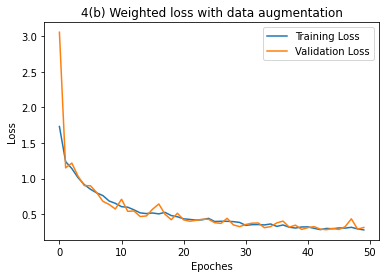

In [7]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q4_b_50e_no9")
plt.show()

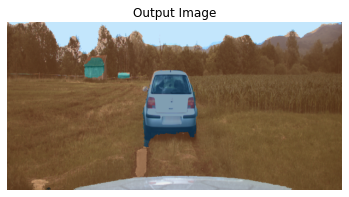

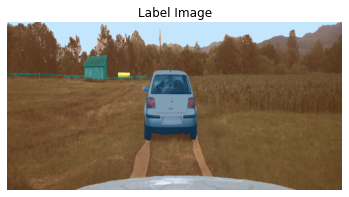

0

In [8]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize(model_name, test_loader, device)